# Phénologie dans les Pyrénées : étude de la pollinisation par les bourdons sauvages

## Introduction

Ce projet porte sur la phénologie, c'est-à-dire l'étude des événements biologiques saisonniers dans le monde animal et végétal. Cela concerne le dépliement des feuilles et la pollinisation des plantes au printemps ou en été; la maturation des fruits, le changement de couleur et la chute des feuilles en automne, ainsi que l'apparition et le départ des oiseaux migrateurs et le moment de l'élevage des animaux.

Dans notre cas, on s'intéresse à la pollinisation de plantes sauvages par des bourdons (*bumblebees an anglais*) dans les Pyrénées.

Contrairement au TP précédent, celui-ci sera bien moins guidé. Si vous souhaitez trouver de l'aide, n'hésitez pas à lire le papier scientifique sur lequel ce projet ce base : [Bumblebees moving up: shifts inelevation ranges in the Pyreneesover 115 years.](http://dx.doi.org/10.1098/rspb.2020.2201) par Léon Marshall *et al.* Proc. R. Soc. B (2020)


Les données pour ce projet sont réelles. Les conclusions que vous en tirerez également.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loi normale ou non. Les tests de normalité sont des cas particuliers des tests d'adéquation (ou tests d'ajustement, tests## Contexte

Les températures à l'échelle mondiale augmentent depuis plusieurs décennies en particulier aux altitudes et latitudes élevées. Cette augmentation a un impact sur la répartition spatiale de la biodiversité, poussant souvent les espèces vers des altitudes et des latitudes plus élevées afin de vivre à  des températures similaires à leur habitat d'autrefois. Cela peut entraîner la disparition de certaines espèces qui habitaient auparavant dans les zones les plus froides car les conditions climatiques favorables n'existent plus ou alors des espèces invasives entrent en compétition et accaparent les ressources.
Lorsque plusieurs espèces sont en interaction, la réponse au changement climatique est encore plus compliquée puisque ces espèces peuvent réagir différemment au réchauffement climatique ou peuvent ne pas avoir la meme capacité de dispersion. Les différences dans la direction ou la vitesse des changements d'aire de répartition pourraient entraîner des décalages phénologiques ou spatiaux dans les relations plantes-pollinisateurs.

Dans ce TP, nous nous intéressons aux changements possible de pollinisation de plantes sauvages par les bourdons dans les Pyrénées qui auraient eu lieu entre 1889 et 2006. Les communautés de bourdons et de plantes ont-elle changé de composition et/ou d'altitude à cause du changement climatique ? Les bourdons pollinisent-ils toujours les mêmes plantes ?

### Bourdons

Les bourdons font partie des principaux pollinisateurs de plantes au même titre que les abeilles. 

<img src=https://upload.wikimedia.org/wikipedia/commons/1/15/Bombus_September_2007-2.jpg width=200/> 
<img src=https://upload.wikimedia.org/wikipedia/commons/8/8f/Bombus_hypnorum_male_-_side_%28aka%29.jpg width=150>

Grâce à leur fourrure isolante, ils ont la particularité de polliniser des plantes dans les environnements les plus froids (en altitude ou en fin de saison) et on les rencontre normalement dans les régions tempérées mais aussi dans les régions plus fraîches que celles très fréquentées par les abeilles.

### Zone étudiée   

Ce TP étudie des données de la commune de Gavarnie-Gèdre dans le département des Hautes-Pyrénées en France, située à côté de la frontière avec l'Espagne. La zone étudiée fait partie du Parc National des Pyrénées (etabli depuis 1967) situé dans la partie ouest des Pyrénées. 

Le parc national est situé entre 1000m et son sommet, 3298m, le Pic Vignemale. La région abrite une flore et une faune vastes et diversifiées avec de nombreuses espèces endémiques (restreinte à cet emplacement géographique). Bien que protégée, elle abrite aussi des habitations et des terres agricoles. Les habitations sont généralement à des altitudes plus basses et les zones agricoles plus haut à flanc de montagne, jusqu'à 2000m. 

<img src=https://www.tourisme-hautes-pyrenees.com/var/ezflow_site/storage/images/media/images/grands-sites/gavarnie/cirque-de-gavarnie2/23250-5-fre-FR/Cirque-de-Gavarnie_format_603x400.jpg width=600>

De manière générale, la végétation de la région correspond à des prairies de fauche et une forêt de pins, avec une ligne d'arbres autour de 2000m d'altitude (altitude maximale des arbres). La région a des climats océaniques et montagnards avec une température annuelle moyenne d'environ 6,5°C et des précipitations annuelles moyennes de 1049mm.


### Le jeu de données

Nous avons accès à deux collections d'échantillons séparés de 115 ans. 

Entre le 5 et le 31 août 1889, le biologiste et naturaliste Prof. Julius MacLeod, a échantillonné les plantes et les communautés de visiteurs des plantes, à sept endroits de la région compris entre 1000 et 2800m d'altitude, avec des visiteurs des plantes enregistrés jusqu'à 2100m d'altitude. Il a publié un récit des plantes et des visiteurs des plantes qu'il a observés en 1891 dans "De pyreneënbloemen". L'objectif de cette enquete était de comparer la communauté florale le long des gradients d'habitat et d'altitude dans les Pyrénées. Néanmoins, MacLeod a collecté et identifié tous les insectes visiteurs observés lors de l'étude de la communauté végétale. MacLeod a étudié 263 espèces de plantes distinctes avec 569 visiteurs d'insectes distincts. Les bourdons collectés par MacLeod ont été identifiés par le professeur Otto Schmiedeknecht.

<img src=https://royalsocietypublishing.org/cms/asset/4f7f9ca3-1258-40d4-89c3-4529eff166ac/rspb20202201f01.jpg width=600>

En août 2005 et août 2006, de nouveaux échantillons ont été collectés en cherchant à rendre les études de 1889 et celle de 2005-2006 aussi comparables que possible en termes de plantes visitées, de lieux et d'altitudes. La cible est de comparer les visiteurs des plantes et pour cela il a fallu trouver une correspondance avec le lieu et les espèces végétales observées par MacLeod. Si cela n'était pas possible, un autre emplacement proche à une altitude similaire avec la même espèce végétale observée par MacLeod a été recherché. De plus, des visiteurs d'autres plantes à fleurs aux emplacements d'origine de MacLeod ont été observés et enfin, d'autres espèces de plantes à fleurs ont été observées à des emplacements correspondant en altitude, mais différents des emplacements MacLeod.


Les localisations des échantillons sont visibles sur la figure ci-dessus.


### A quoi correspond l'échantillonnage ?

Ce paragraphe permet de vous rendre compte de la quantité de travail nécessaire pour obtenir ce type de données.

Pour chaque lieu, une parcelle a été observée pendant 15 min. La taille de la parcelle a été déterminée comme la plus grande surface d'une parcelle de fleurs sur laquelle tous les visiteurs pouvaient être observés (de quelques mètres carrés à une dizaine de mètres carrés selon la croissance et la floraison des espèces végétales). Au cours des 15 minutes, tous les bourdons visiteurs ont été capturés puis identifiés par des experts, excepté pour *B. gerstaeckeriqui* qui a été identifié à vue car il est reconnaissable sur le terrain et rare. La surface de chaque parcelle a été mesurée et sa densité de fleurs a été enregistrée. L'altitude et les coordonnées GPS (WGS 84) de chaque parcelle ont également été enregistrées.

*Ceci étant dit, passons à l'analyse des données !*
 


# Analyse du climat

Dans quelle mesure y a-t-il eu un changement climatique dans les Pyrénées ? 

Vous avez accès au fichier [Regional_Trend_Temps.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv") à l'adresse https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/. Chargez-le dans un objet appelé `climat_an`.

Pour chaque parcelle (`Grid-ID`) on connait ses coordonnées (`Latitude` et `Longitude`), son altitude (`Elevation`) et la température moyenne (`AnnualMeanTemp`), minimale (`Avg_min`) ou maximale (`Avg_max`) pour chaque année (`Year`).


Quelle est la dimension de la table ? Combien y a-t-il de parcelles ? Quelle est la température moyenne des mesures de température moyenne, minimale et maximale ? Il y a une chose bizarre. Corrigez la table. Décrivez le reste de la table.

In [2]:
climat_an = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv")
climat_an.head()

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_min,Avg_max
0,1901,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1,1901,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
2,1901,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
3,1901,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
4,1901,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667


In [3]:
climat_an.shape

(19293, 8)

<span style="color:green">
La table est de dimensions 19293 lignes, 8 colonnes.
Chaque ligne correspond a une parcelle, donc 19293 parcelles

In [4]:
print("La moyenne des températures moyenne : ", climat_an["AnnualMeanTemp"].mean())
print("La moyenne des températures minimales : ", climat_an["Avg_min"].mean())
print("La moyenne des températures maximales : ", climat_an["Avg_max"].mean())

La moyenne des températures moyenne :  3.928845954492303
La moyenne des températures minimales :  7.986246738889338
La moyenne des températures maximales :  -0.12878159608666362


<span style="color:green">
Les températures maximales et minimales sont inversées, on va inverser les colonnes avg_min et avg_max

In [5]:
climat_an.columns = ["Year", "Grid-ID", "ALatitude", "Longitude", "Elevation", "AnnualMeanTemp", "Avg_max", "Avg_min"]
climat_an.head()

,Year,Grid-ID,ALatitude,Longitude,Elevation,AnnualMeanTemp,Avg_max,Avg_min
0,1901,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1,1901,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
2,1901,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
3,1901,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
4,1901,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667


In [6]:
print("Apres avoir inversé les colonnes : " )
print("La moyenne des températures moyenne : ", climat_an["AnnualMeanTemp"].mean())
print("La moyenne des températures minimales : ", climat_an["Avg_min"].mean())
print("La moyenne des températures maximales : ", climat_an["Avg_max"].mean())

Apres avoir inversé les colonnes : 
La moyenne des températures moyenne :  3.928845954492303
La moyenne des températures minimales :  -0.12878159608666362
La moyenne des températures maximales :  7.986246738889338


<span style="color:green">

Chaque ligne de la table correspond a une parcelle décrite par un GRID-ID unique, l'année a laquelle on l'a observée, des coordonées gps, une altitude et une température moyenne, min et max

A partir de cette table uniquement, répondez à la question suivante : Comment évolue la température dans les Pyénées au 20eme siècle (faites une figure) ? Quel est le changement moyen de température par décennie et avec cette estimation? Quelle température attend-on en 2050 ?

<Axes: xlabel='YEAR', ylabel='TEMPERATURES'>

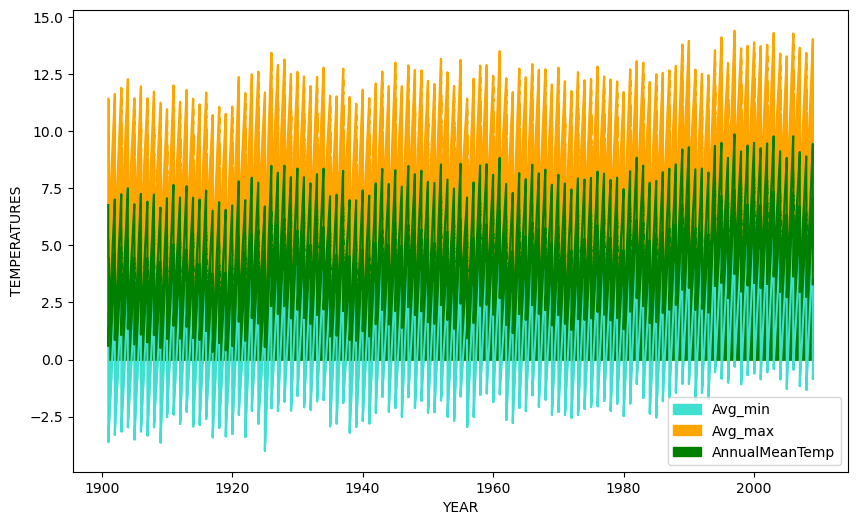

In [42]:
climat_an.plot(kind='area', x='Year', y=['Avg_min','Avg_max','AnnualMeanTemp',],stacked=False, 
               figsize=(10,6), color=['Turquoise', 'Orange','Green'],alpha=1.0
               ,xlabel="YEAR", ylabel="TEMPERATURES")

<span style="color:green">
On remarque que la températures aux Pyrénnées a augmenté durant le 20 ème siècle.

<function matplotlib.pyplot.show(close=None, block=None)>

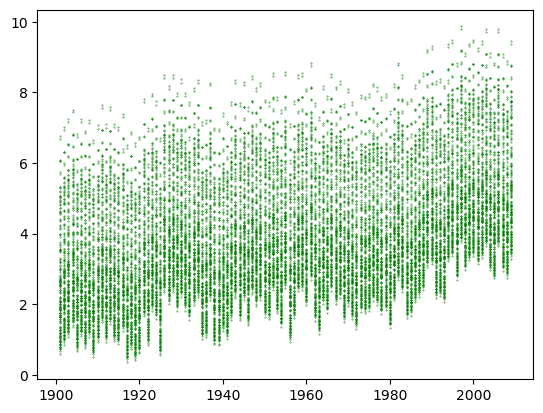

In [8]:
plt.scatter(climat_an['Year'], climat_an['AnnualMeanTemp'], s=0.1, color = 'green')
plt.show

<span style="color:green">
Ce graphe justifie le choix d'une regréssion linéaire comme modèle car on peut faire l'hypothèse d'une dépendance de la température moyenne en fonction du temps, selon les données qu'on apperçoit. La pente correspondra au changement moyen de température année après année.

In [43]:
climat_an['Year'].shape

(19293,)

In [44]:
X = climat_an['Year'].values.reshape(-1, 1)
X.shape

(19293, 1)

In [45]:
y = climat_an['AnnualMeanTemp'].values.reshape(-1, 1)
y.shape

(19293, 1)

In [46]:
reg = sk.linear_model.LinearRegression().fit(X,y)
print(reg.coef_)

[[0.01962392]]


<function matplotlib.pyplot.show(close=None, block=None)>

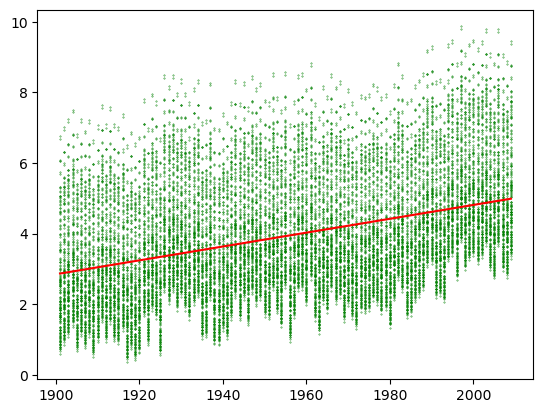

In [47]:
plt.scatter(climat_an['Year'], climat_an['AnnualMeanTemp'], s=0.1, color = 'green')
plt.plot(X,reg.predict(X), color ='red')
plt.show

<span style="color:green">
Cette valeur ci-dessus est la pente de la droite qui représente l'évolution moyenne de la température. On la multiplie par 10 pour avoir l'évolution moyenne par décénie : 

In [14]:
print("La température augmente d'environ : ", reg.coef_*10, " par décénie")

La température augmente d'environ :  [[0.19623922]]  par décénie


In [15]:
reg.predict([[2050]])

array([[5.7931185]])

<span style="color:green">
La température moyenne attendue en 2050 est d'environ 5.8 degrés.

### Utilisation des sols

Nous allons travailler sur le fichier [Regional_LandUse.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv") disponible sur la même page internet que précedemment. Chargez le dans un objet appelé `landUse`.

Pour chaque parcelle (`Grid_ID`), on a sa zone d'élevation (`EleZone`) qui correspond à de la moyenne montagne, une zone subalpine ou alpine (*z1, z2, z3 respectivement*) ainsi que son altitude moyenne (`Avg_Ele`). Ensuite, on connait aussi l'utilisation de ces sols pour chaque décennie (`LUn` où *n* est la décennie). Le code est le suivant 333 = Forêt, 444 = Prairie et 555 = Autres (neige ou sol caillouteux).


Pour chaque zone d'élevation, l'utilisation des sols a-t-elle changée au cours du XXe siècle ? Faites au moins une figure.

In [16]:
# votre code ici 
#Code de lecture: 333 = Forest, 444 = Grassland, 555 = Other (e.g. Snow and bare ground)
landUse = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv ")
landUse.head()



,Grid_ID,Avg_Ele,LU1910,LU1920,LU1930,LU1940,LU1950,LU1960,LU1970,LU1980,LU1990,LU2000,LU2010,EleZone
0,1,2188.501217,555,555,555,555,555,555,555,555,555,555,555,z3
1,2,1632.670093,444,333,333,333,333,333,333,444,444,444,444,z2
2,3,1343.865375,444,444,333,333,333,333,333,333,333,333,333,z1
3,4,2079.838211,444,333,333,333,333,333,444,444,444,444,444,z3
4,5,1687.210676,444,333,333,333,333,333,333,333,333,333,333,z2


In [17]:
def sol_Use(df, elezone):
    
    columns = [f"LU{lu}" for lu in np.arange(1910,2020,10)] 
    sols = enumerate([(555, 'yellow'), (444, 'pink'), (333, 'turquoise')])
    largeur = 0.3
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for index, (val, color) in sols :
        cpt = []
        for lu in np.arange(1910, 2020, 10):
            dfBis = df[(df['EleZone'] == elezone) & (df[f'LU{lu}'] == val)]
            cpt.append(len(dfBis))
        
       
        x_pos = np.arange(len(np.arange(1910, 2020, 10))) + (index - 1) * largeur
        ax.bar(x_pos, cpt, width=largeur, color=color, label=str(val))

    
    ax.set_ylabel('Nombre de terrains')
    ax.set_xlabel('Décennies')
    ax.set_xticks(np.arange(len(np.arange(1910, 2020, 10))))
    ax.set_xticklabels(columns)
    ax.set_title(f"Répartition de l'utilisation du sol pour l'EleZone {elezone}")
    ax.legend()

    plt.xticks(fontsize=8)
    plt.xticks(rotation=45)

 
    plt.show()





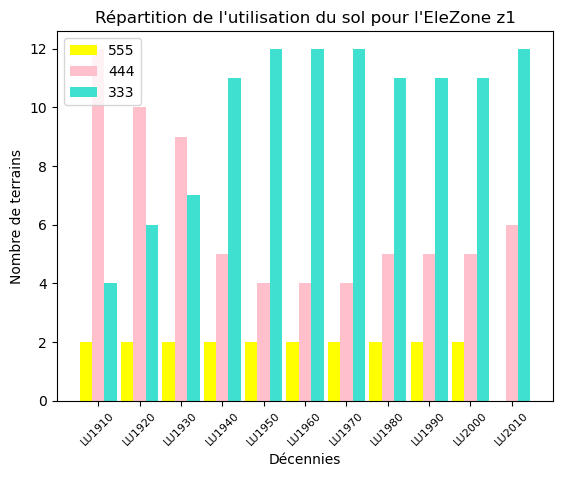

In [48]:
sol_Use(landUse, "z1")

<span style="color:green">
On remarque que dans la moyenne montagne, on ne retrouve plus de sols neigeux ou caillouteux. Il y a aussi beaucoup moins de prairies en fin de 20ème siècle qu'au début, on retrouve le phénomène inverse pour les forêts qui quant à elles ont augmenté avec le temps.

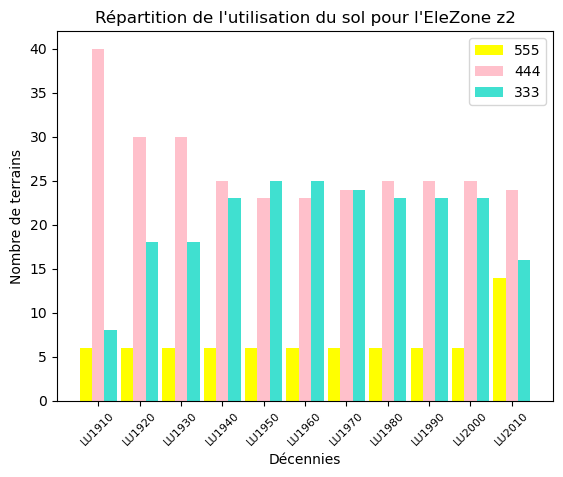

In [49]:
sol_Use(landUse, "z2")

<span style="color:green">
En zone subalpine, il y a un augmentation des sols caillouteux ou neigeux, une baisse significative des prairies et pour finir une augmentation des forêts, tendance qui s'inverse au début du 21ème siècle. (Déforestation ?)

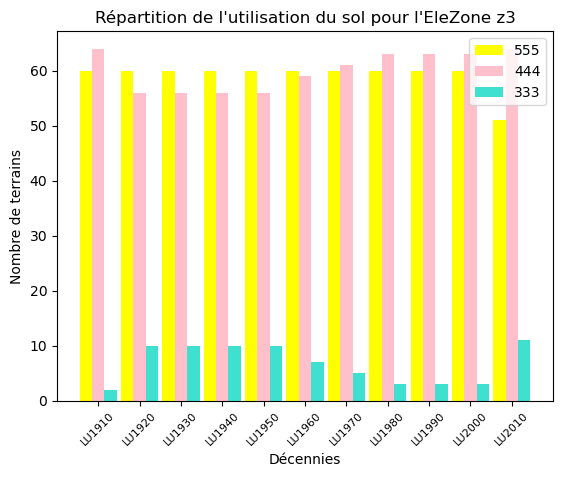

In [50]:
sol_Use(landUse, "z3")

<span style="color:green">
La zone alpine quant à elle n'a pas eu une utilisation des sols qui a beaucoup varié durant le 20ème siècle. En effet, on a seulement une légère fluctuations du nombre de forêts, de prairies et de sols caillouteux ou neigeux; mais rien de significatif

<span style="color:green">
La baisse de variation de l'utilisation des sols plus on monte en altitude est peut-être liée au fait que l'impact de l'homme se fait moins ressentir à hautes altitudes. En effet, en moyenne montagne et en zone subalpine les changements durant le 20ème siècle sont beaucoup plus élevés et ce sont des endroits où des hommes vivent contrairement a la zone alpine qui est très peu (voire pas) habitée.
    

### Richesse de la biodiversité

Avant de continuer notre analyse sur la biodiversité, on va évaluer la qualité d'échantillonnage des parcelles. On s'intéresse donc à la *quantité* de biodiversité échantillonnée au XIXe et au XXe. A partir de ces estimations on va pouvoir répondre à la question suivante: est-ce que la richesse de biodiversité a évolué au XXe siècle?

MacLeod et l'équipe de 2005-2006 n'ont pas fourni les mêmes efforts d'échantillonnage. Avec les moyens techniques récents, il est plus facile d'observer la biodiversité. Afin de comparer les 2 expériences, il faut comparer la quantité d'espèces observées *étant donné l'effort d'échantillonnage*. En effet, en écologie une difficulté est d'estimer ce que signifie biodiversité. Dit autrement, si vous n'échantillonnez qu'un seul individu, vous n'aurez qu'une seule espèce présente dans votre parcelle alors que si vous échantillonnez 100,000 individus (comprendre, un individu = un insecte et, une espèce comporte plusieurs individus) alors vous aurez probablement échantillonné toutes les espèces présentes sur votre parcelle. Est-ce que l'observation de 15min d'une parcelle est suffisante pour ce faire une idée de la biodiversité ?

Pour répondre à cette question on va produire une *courbe de raréfaction* qui correspond au nombre d'individus échantillonnés sur l'axe des x par rapport au nombre d'espèces sur l'axe des y.  Pour chaque parcelle, nous allons sous-échantillonner notre jeu de données et regarder combien d'espèce on trouve. 

Vous utiliserez des objets déjà utilisés mais aussi les données de [Bumblebee_data_climate_Marshall_et_al_2020.csv](https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv). Chargez cette table dans `bumblebee`.
Cette table contient les positions géographiques des échantillonnages (`Longitude` et `Latitude`),la température (`clim`), l'espèce observée `Visitor` et la plante visitée `Plant`. il y a aussi la `Date` d'échantillonnage, le `Site` avec son altitude minimale, maximale et sa zone d'élevation (`MinEle` et `MaxEle`, `EleZone`). Il y a aussi l'origine de l'échantillonnage (`Data` vaut MacLeod ou 'Biesmeijer' pour l'étude de 2005-2006)

Commencez par estimer le nombre d'espèces observées par site par période d'étude et comparez-le au nombre d'individus. *A priori*, y  a-t-il saturation lors de l'échantillonnage ? A quelle(s) altitude(s) observe-t-on le plus d'individus ? d'espèces ? Enfin, calculez la courbe de raréfaction et commentez.


In [21]:
#votre code ici
import random 

bumblebee = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv")
bumblebee.head()


,Longitude,Latitude,Visitor,Plant,Date,Site,Data,MinEle,MaxEle,EleZone,clim
0,-0.041130,42.74037,Bombus terrestris complex,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1900,1900,1800-2000,10.5
1,-0.038612,42.74206,Bombus sichelii,Carduus defloratus,18/8/1889,Port de Gavarnie,MacLeod,1800,1800,1800-2000,10.9
2,-0.036181,42.70804,Bombus sichelii,Carduus carlinoides,15/8/1889,weg naar de Br�che de Roland (Gavarnie),MacLeod,2000,2000,2000-2200,9.9
3,-0.035850,42.74282,Bombus hortorum,Scutellaria alpina,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4
4,-0.035850,42.74282,Bombus lapidarius,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4


In [23]:
bumblebeeSpe = pd.DataFrame(columns=["Site", "Data", "Nb_especes","Nb_individus"])

In [24]:
for (site, data), obs in bumblebee.groupby(["Site", "Data"]):
    individus = len(obs)
    especes = len(obs["Visitor"].unique())

    bumblebeeSpe = pd.concat([bumblebeeSpe, pd.DataFrame({
        "Site" : [site],
        "Data" : [data],
        "Nb_individus": [individus],
        "Nb_especes": [especes]
    })], ignore_index=True)

bumblebeeSpe.reset_index()
bumblebeeSpe.head(100)

,Site,Data,Nb_especes,Nb_individus
0,Cirque de Gavarnie,MacLeod,2,2
1,Gavarnie,MacLeod,9,87
2,Gedre,MacLeod,11,171
3,Gedre (op akkerland),MacLeod,1,1
4,H�as,MacLeod,1,1
...,...,...,...,...
95,P156,Biesmeijer,4,4
96,P157,Biesmeijer,1,3
97,P161,Biesmeijer,4,8
98,P162,Biesmeijer,3,6


In [58]:
bumblebeeAlt = pd.DataFrame(columns=["Zone", "Nb_especes","Nb_individus"])

for zone, obs in bumblebee.groupby(["EleZone"]) :
    individus = len(obs)
    especes = len(obs["Visitor"].unique())

    bumblebeeAlt = pd.concat([bumblebeeAlt, pd.DataFrame({
        "Zone" : [zone],
        "Nb_individus": [individus],
        "Nb_especes": [especes]
    })], ignore_index=True)

bumblebeeAlt.reset_index()
bumblebeeAlt.head(100)


/tmp/ipykernel_65/407156424.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for zone, obs in bumblebee.groupby(["EleZone"]) :


,Zone,Nb_especes,Nb_individus
0,1000-1200,11,247
1,1200-1400,11,51
2,1400-1600,11,259
3,1600-1800,12,191
4,1800-2000,9,64
5,2000-2200,8,42


<span style="color:green">
On retrouve le plus d'individus à 1400-1600 mètres d'altitude, le plus d'espèces à 1600-1800 mètres.

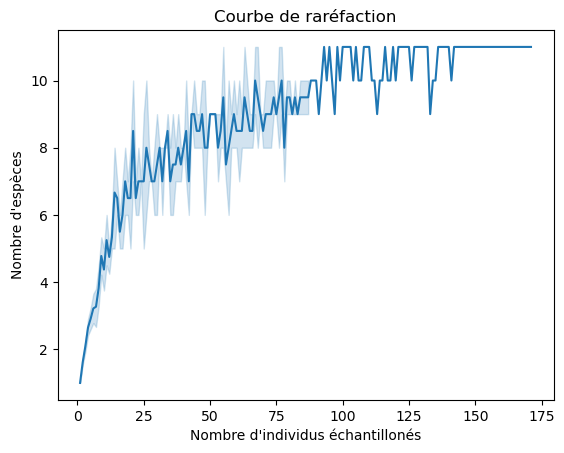

In [57]:
courbe = pd.DataFrame(columns=["Site","Nb_individus", "Nb_especes"])


for (site, data), obs in bumblebee.groupby(["Site", "Data"]):
    
    it = np.arange(len(obs)) + 1
    for i in it :
       
        sample = random.sample(list(obs["Visitor"]), i)
        especes = len(set(sample))
      
        result = pd.DataFrame({"Site": [site], "Nb_individus": [i], "Nb_especes": [especes]})
        courbe = pd.concat([courbe, result], ignore_index = True)


sns.lineplot(x="Nb_individus", y="Nb_especes", data=courbe)
plt.title("Courbe de raréfaction")
plt.xlabel("Nombre d'individus échantillonés")
plt.ylabel("Nombre d'espèces")
plt.show()

<span style="color:green">
Il y a bien une saturation lors de l'échantillonage, on remarque qu'arrivé a un certain nombre d'échantillon on a plus de nette augmentation du nombre d'espèces.
En effet, on va forcément atteindre un plafond (le max d'espèces existantes) et on peut continuer a echantionner un nombre infini d'individus il n'y aura pas plus d'espèces que le max d'espèces. 

### Adaptation aux températures

Pour chaque espèce, représentez les températures à laquelles elles ont été échantillonnées en 1889 et en 2005-2006. Faites une figure et répondez aux questions suivantes : la température moyenne a-t-elle changé ? Les bourdons se sont-ils adaptés à l'augmentation de température dans les Pyrénées ? Si oui, comment ?


Lorsque vous avez plusieurs réplicats pour deux conditions d'échantillonnage il est possible de tester statistiquement si les valeurs sont différentes ou pas. Pour chaque espèce, vous pouvez faire ici un test non paramétrique [ANOVA](https://fr.wikipedia.org/wiki/Test_de_Kruskal-Wallis) pour tester si le climat auquel les bourdons pollinisent est plus chaud ou pas qu'en 1889.

In [27]:
# votre code ici
import statsmodels.formula.api as smf
import statsmodels.stats.anova as sm
from statsmodels.formula.api import ols



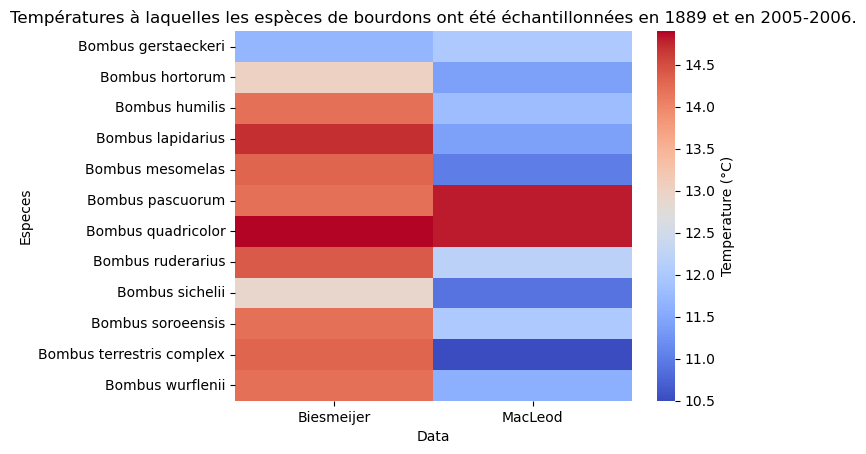

In [59]:
temp = pd.DataFrame(columns=["Especes", "Data", "Temperature"])

for (visitor, data), obs in bumblebee.groupby(["Visitor", "Data"]) :
    bumblebeeTemp = obs["clim"].values[0]
    
    temp = pd.concat([temp, pd.DataFrame({
        "Especes" : [visitor],
        "Data" : [data],
        "Temperature": [bumblebeeTemp]
    })])

heatmap_df = temp.pivot(index="Especes", columns="Data", values="Temperature")
sns.heatmap(heatmap_df, cmap='coolwarm', cbar_kws={"label": "Temperature (°C)"})
plt.title("Températures à laquelles les espèces de bourdons ont été échantillonnées en 1889 et en 2005-2006.")
plt.xlabel("Data")
plt.ylabel("Especes")
plt.show()


<span style="color:green">
On remarque bien une augmentation de la température d'observation entre 1889 et 2005, mise à  part pour le 'Bombus quadricolor' et le 'Bombus ruderarius'. 

In [29]:
for species in bumblebee["Visitor"].unique() :
    
    species_data = bumblebee[bumblebee["Visitor"] == species]
    
    temp_1889 = species_data[species_data["Data"] == "MacLeod"]["clim"]
    temp_2005 = species_data[species_data["Data"] == "Biesmeijer"]["clim"]
    
    formula ='clim ~ Data'

    model = ols(formula, species_data).fit()
    anova_results = sm.anova_lm(model, typ=2)


    print(species)
    print(anova_results)


Bombus terrestris complex
              sum_sq    df         F    PR(>F)
Data       15.601737   1.0  9.995266  0.002176
Residual  132.677573  85.0       NaN       NaN
Bombus sichelii
              sum_sq    df           F        PR(>F)
Data      105.518526   1.0  149.147593  1.330134e-19
Residual   53.768269  76.0         NaN           NaN
Bombus hortorum
             sum_sq    df          F        PR(>F)
Data      49.086683   1.0  30.924725  7.125127e-07
Residual  92.063150  58.0        NaN           NaN
Bombus lapidarius
             sum_sq    df         F    PR(>F)
Data       1.366871   1.0  2.687767  0.106269
Residual  31.021701  61.0       NaN       NaN
Bombus humilis
             sum_sq    df          F    PR(>F)
Data      15.205804   1.0  13.881712  0.000402
Residual  73.390718  67.0        NaN       NaN
Bombus mesomelas
              sum_sq     df          F    PR(>F)
Data       19.493739    1.0  15.931429  0.000099
Residual  200.670840  164.0        NaN       NaN
Bombus wurfle

### Changements d'altitude

L'altitude moyenne a-t-elle variée en 115 ans ? On peut aussi s'intéresser aux plantes visitées. Ont-elles changé d'altitude ?

In [30]:
# votre code ici
alt_mean = bumblebee.groupby(["Visitor", "Data"])["MinEle"].mean()
print(alt_mean)

Visitor                    Data      
Bombus gerstaeckeri        Biesmeijer    2150.000000
                           MacLeod       1750.000000
Bombus hortorum            Biesmeijer    1377.238095
                           MacLeod       1306.410256
Bombus humilis             Biesmeijer    1427.863636
                           MacLeod       1152.000000
Bombus lapidarius          Biesmeijer    1539.673913
                           MacLeod       1123.529412
Bombus mesomelas           Biesmeijer    1715.979167
                           MacLeod       1465.909091
Bombus pascuorum           Biesmeijer    1327.796296
                           MacLeod       1063.235294
Bombus quadricolor         Biesmeijer    1209.973684
                           MacLeod       1142.857143
Bombus ruderarius          Biesmeijer    1683.428571
                           MacLeod       1462.500000
Bombus sichelii            Biesmeijer    1611.461538
                           MacLeod       1641.538462
Bombus s

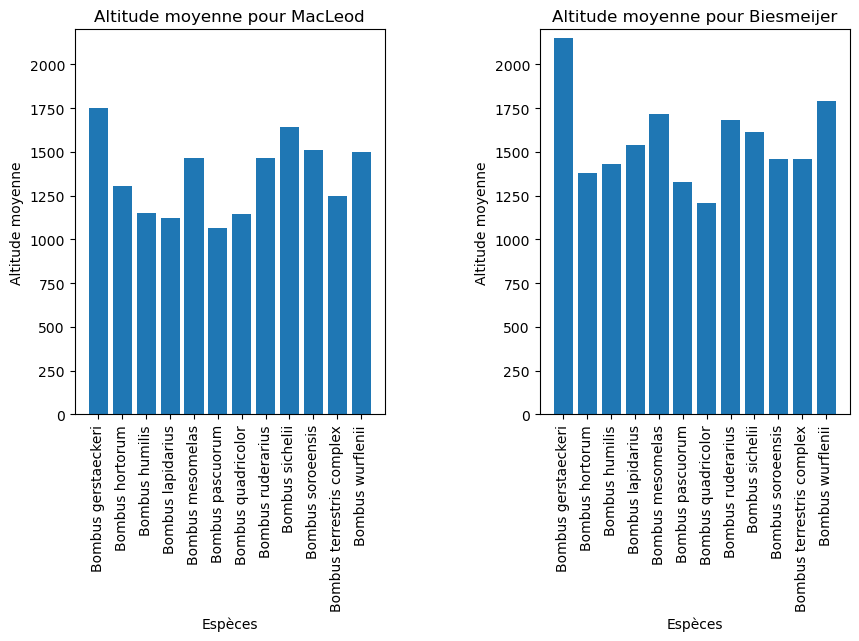

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, data in enumerate(["MacLeod", "Biesmeijer"]):
    ax = axes[i]
    alt_means_data = alt_mean[:, data]
    ax.bar(alt_means_data.index, alt_means_data)
    ax.set_ylabel("Altitude moyenne")
    ax.set_xlabel("Espèces")
    ax.set_title(f"Altitude moyenne pour {data}")
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylim([0, 2200])
    plt.subplots_adjust(wspace=0.5)
      
plt.show()


<span style="color:green">
L'altitude moyenne des espèces a augmenté en 115 ans, probablement a cause de l'augmentation de température qui les pousse a migrer vers des zones plus adaptées a elles.

In [38]:
plants_alt_mean = bumblebee.groupby(["Plant", "Data"])["MinEle"].mean()
print(plants_alt_mean)

Plant                 Data      
Achillea millefolium  Biesmeijer    1642.000000
Aconitum sp.          Biesmeijer    1912.618182
                      MacLeod       1540.000000
Allium lusitanicum    Biesmeijer    1612.500000
                      MacLeod       1150.000000
                                       ...     
Trifolium repens      MacLeod       1206.250000
Verbascum  nigrum     MacLeod       1160.000000
Verbena officinalis   Biesmeijer    1198.000000
                      MacLeod       1080.000000
buddleia              Biesmeijer    1193.000000
Name: MinEle, Length: 103, dtype: float64


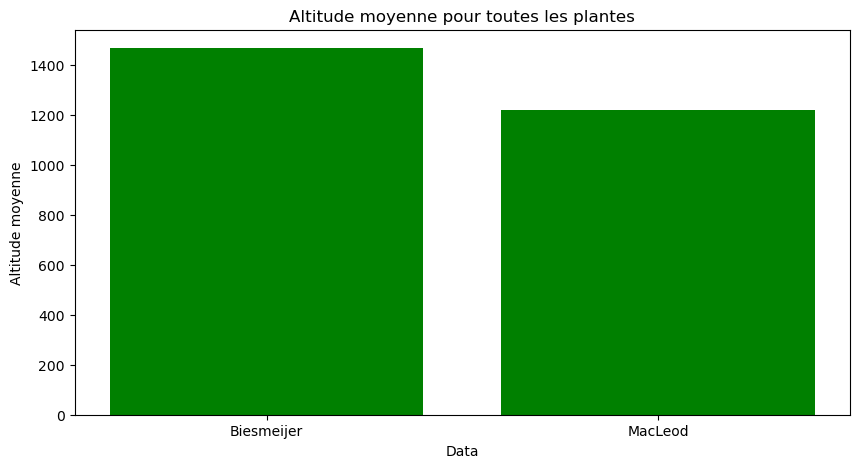

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))

plants_means_data = bumblebee.groupby(["Plant", "Data"])["MinEle"].mean().unstack()
plants_means_data = plants_means_data[plants_means_data.notna().all(axis=1)]
means = plants_means_data.mean()

x_labels = means.index
x_pos = range(len(x_labels))

ax.bar(x_pos, means, align='center', color='green')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Altitude moyenne")
ax.set_xlabel("Data")
ax.set_title("Altitude moyenne pour toutes les plantes")

plt.show()


<span style="color:green">
De même pour les plantes, elles ont aussi migrés vers des zones plus hautes en altitude. Les causes sont très probablement liées : augmentation de la température -> les bourdons migrent vers des zones plus froides (adaptées a eux) -> les bourdons pollinisent les plantes dans des zones plus hautes -> les plantes aussi se retrouvent à des altitudes plus élevées. 

### Figure 4 : pour aller plus loin 


Tracez les profils de fréquentation des trois plantes les plus visitées sur les deux périodes. 
Un profil de fréquentation montre la fréquence de visite le long de l'altitude pour chaque période. Cela permet de distinguer l'altitude moyenne à laquelle les bourdons pollinisent et l'altitude maximale, ces deux valeurs pouvant varier à des vitesses différentes au cours du temps.
On peut aussi regarder si ce sont les mêmes espèces qui pollinisent les plantes.

In [40]:
macLeod = bumblebee[bumblebee["Data"] == "MacLeod"]
biesmeijer = bumblebee[bumblebee["Data"] == "Biesmeijer"]

top_macLeod = macLeod["Plant"].value_counts().head(3).index.tolist()
top_biesmeijer = biesmeijer["Plant"].value_counts().head(3).index.tolist()

print(top_macLeod)
print(top_biesmeijer)


['Carduus defloratus', 'Aconitum sp.', 'Centaurea nigra']
['Centaurea nigra', 'Cirsium vulgare', 'Centaurea scabiosa']


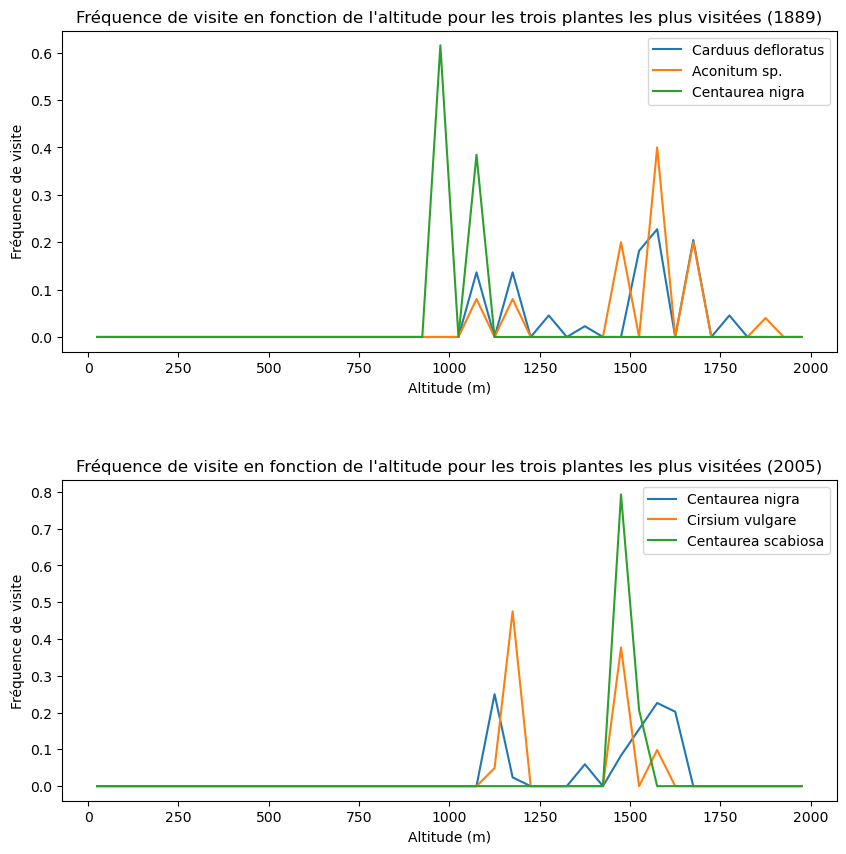

In [62]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

for plant in top_macLeod:

    period1_plant = macLeod[macLeod["Plant"] == plant]
    freq_alt1 = period1_plant.groupby(pd.cut(period1_plant["MinEle"], bins=np.linspace(0, 2000, 41)))['Visitor'].count() / len(period1_plant)

    ax1.plot(freq_alt1.index.categories.mid, freq_alt1.values, label=plant)

ax1.legend()
ax1.set_xlabel('Altitude (m)')
ax1.set_ylabel('Fréquence de visite')
ax1.set_title('Fréquence de visite en fonction de l\'altitude pour les trois plantes les plus visitées (1889)')

for plant in top_biesmeijer:

    period2_plant = biesmeijer[biesmeijer["Plant"] == plant]
    freq_alt2 = period2_plant.groupby(pd.cut(period2_plant["MinEle"], bins=np.linspace(0, 2000, 41)))['Visitor'].count() / len(period2_plant)

    ax2.plot(freq_alt2.index.categories.mid, freq_alt2.values, label=plant)

ax2.legend()
ax2.set_xlabel('Altitude (m)')
ax2.set_ylabel('Fréquence de visite')
ax2.set_title('Fréquence de visite en fonction de l\'altitude pour les trois plantes les plus visitées (2005)')

plt.subplots_adjust(hspace=0.4)
plt.show()



<span style="color:green">
On remarque très clairement grâce a ces deux figures que les plantes les plus visitées en 1889 se trouvent dans des zones plus basses que les plantes les plus visitées en 2005. Cela nous montre que les bourdons ont tendance a plus polliniser a plus haute altitude au début 21eme siècle qu'en 1889.

# Evaluation/Conclusions

Ce TP a permis d'appréhender les corrélations entre changement de température au cours du temps et modification de la biodiversité en prenant l'exemple des bourdons et de la pollinisation de plantes sauvages. 

Commentez vos résultats en faisant (i) un résumé de vos trouvailles (ii) en lien avec le cours (prenez un peu de recul). Peut-on faire des prédictions ? Quelles expériences pourriez vous proposer par la suite ?

<span style="color:green">
Pour conclure, on a tout d'abord remarqué une évolution de l'utilisation des sols notament dans les zones fréquentées par l'homme.
La température aussi a changé durant le 20ème siècle, elle a netement augmenté ce qui a eu de nombreuses conséquences  : Une migration des bourdons vers des zones plus hautes en altitude ainsi qu'une migration des plantes, conséquence de la migration des bourdons.

Les prédictions que l'on pourrait faire : étant donné que la température continue d'augmenter, il se pourrait que les bourdons continuent de monter dans les hauteurs, et donc la biodiversité a basse altitude risquerait d'être impactée (plantes comme bourdons)
